# Mini Projet
## 1. Introduction
<p>Dans le cadre de notre cours, il s’agira pour nous de réaliser un mini-projet qui consiste a analyser et manipuler les données.</p>
<p>Pour sujet j'ai choisi "Exploring the History of Lego" car tout le monde aime les Lego à moins que vous n’ayez jamais marché dessus &#x1F605</p>
<p>mais avant de commencer &#x1F913 saviez-vous d’ailleurs que "Lego" était dérivé de l’expression danoise (Danemark) leg godt, qui signifie "bien jouer".</p>
<p><img src="./img/lego-bricks.jpeg" alt="lego"></p>

##  2. Lecture des données
<p>Dans ce projet, nous analyserons un ensemble de données fascinant sur chaque bloc Lego construit !</p>
<p><img src="./img/downloads_schema.jpeg" alt="schema"></p>
<p>Dans la figure ci-dessus on peut voir le schéma de base de données de Lego. On se concerne sur les datasets "color" et "sets". </p>

<p>Commençons par lire les données de couleurs pour avoir une idée de la diversité des jeux Lego !</p>

In [ ]:
# Importer les modules 
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Lire les données de la base colors
colors = pd.read_csv('datasets/colors.csv')

# Affichier les premières lignes
display(colors.head())

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Explorer les couleurs
<p>Maintenant que nous avons lu les données de dataset <code>colors</code>, nous pouvons commencer à les explorer ! Commençons par comprendre le nombre de couleurs disponibles.</p>

In [ ]:
# Combien de couleurs distinctes sont disponibles?
# Returner les nombre des lignes seulement
num_colors = colors.shape[0]

# Affichier num_colors
print(num_colors)

135


## 4. Couleurs transparentes dans les ensembles Lego
<p>La base <code>colors</code> a une colonne nommée <code>is_trans</code> qui indique si une couleur est transparente ou non. Il serait intéressant d'explorer la distribution des couleurs transparentes et non transparentes.</p>

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


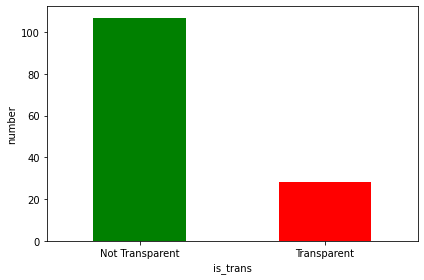

In [ ]:
# Grouper les données de la base colors selon la transparence et les compter
colors_summary = colors.groupby('is_trans').count()
# Affichier resultat
display(colors_summary)

# Diagramme pour comparer les couleurs transparente et non transparente
# Arange([start,] stop[, step,][, dtype]) : Renvoie un tableau avec des éléments régulièrement espacés selon l'intervalle.arange(2)= [0, 2)
# Ainsi, par défaut, la valeur de départ est 0 et la valeur de pas est 1
colors_summary['name'].plot(kind='bar', color=["green", "red"])
plt.xticks(np.arange(2), ('Not Transparent', 'Transparent'), rotation=360)
plt.ylabel("number")
plt.show()

## 5. Découvrez le dataset sets de Lego
<p>Un autre dataset intéressant disponible dans cette base de données est le dataset <code>sets</code>.Il contient une liste complète des ensembles au fil des ans et le nombre de pièces que chacun de ces ensembles contenait. </p>
<p> <img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Utilisons ces données pour explorer comment le nombre moyen de pièces dans les ensembles Lego a varié au fil des ans.</p>

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


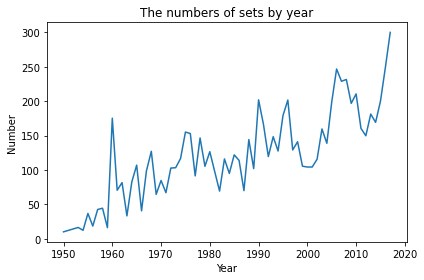

In [ ]:
# Lire sets data comme `sets`
sets = pd.read_csv('datasets/sets.csv')
display(sets.head())

# Créer un résumé du nombre moyen de pièces par année: `parts_by_year`
# Mean(moyenne) = add up all the given values, then divide by how many values there are.
parts_by_year = sets.groupby('year').mean()['num_parts']

# Plot trends du nombre moyen de pièces par an
plt.plot(parts_by_year)
plt.title("The numbers of sets by year")
plt.xlabel("Year")
plt.ylabel("Number")
plt.show()


## 6. Thèmes Lego au fil des ans
<p>Lego blocs sont sous plusieurs <a href="https://shop.lego.com/en-US/Themes">themes</a>. Essayons de comprendre comment le nombre de thèmes expédiés a varié au fil des ans.</p>

,theme_id
year,
1950,7
1953,4
1954,14
1955,28
1956,12


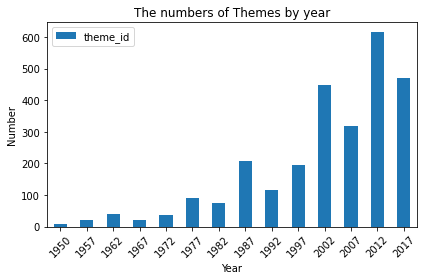

In [37]:
# themes_by_year: Nombre de thèmes expédiés par année
themes_by_year = sets.groupby('year').count()[['theme_id']]
# Affichier les premières lignes
display(themes_by_year.head())

# loc:Accédez à un groupe de lignes et de colonnes 
idx = themes_by_year.index[::5]
themes_by_year.loc[idx].plot(kind='bar')
plt.title("The numbers of Themes by year")
plt.xlabel("Year")
plt.ylabel("Number")
plt.xticks(rotation=45)
plt.show()

## 7. Nombre des themes uniques d'une année
<p>Les blocs Lego offrent une quantité illimitée de plaisir à travers les âges. Nous avons exploré quelques tendances intéressantes autour des couleurs, des pièces et des thèmes. Avant de conclure, examinons de plus près <code>themes_by_year</code> DataFrame que nous avons créé à l'étape précédente.</p>

In [ ]:
# Obtenir le nombre de thèmes uniques sortis en 1999
num_themes = themes_by_year.loc[1999, 'theme_id']

# Affichier le nombre de thèmes uniques sortis en 1999
print(num_themes)

300
